In [14]:
import cv2 #pip install opencv-python
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model, config_file)

classLabels = []
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)


< cv2.dnn.Model 0x7f27913bfe10>

In [53]:
img = cv2.imread('dogs.webp')

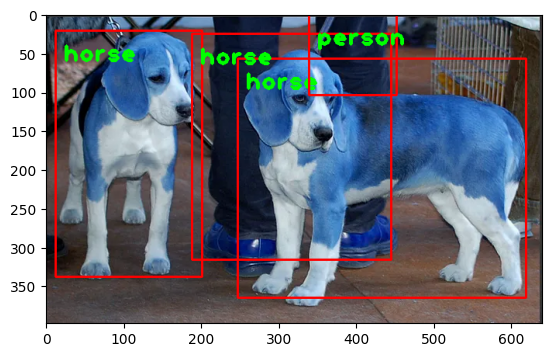

In [54]:
classIndex, confidence, bbox = model.detect(img, confThreshold=0.5) #tune confThreshold for best results
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for classInd, conf, boxes in zip(classIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255, 0, 0), 2)
    cv2.putText(img, classLabels[classInd-1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = font_scale, color=(0, 255, 0), thickness=3)
plt.imshow(img)

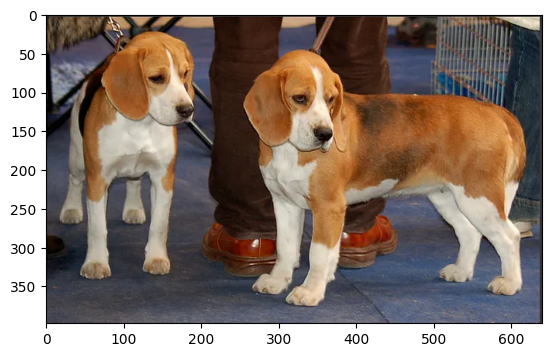

In [55]:
image = plt.imread('dogs.webp')
image.shape
plt.imshow(image)

In [56]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

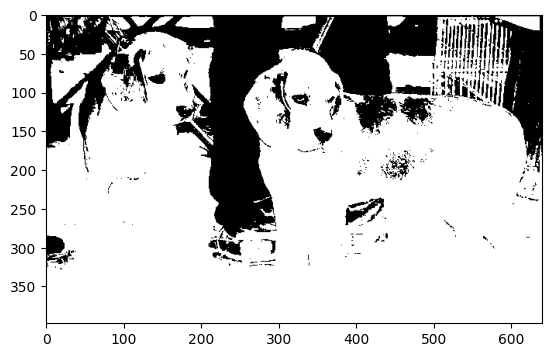

In [57]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

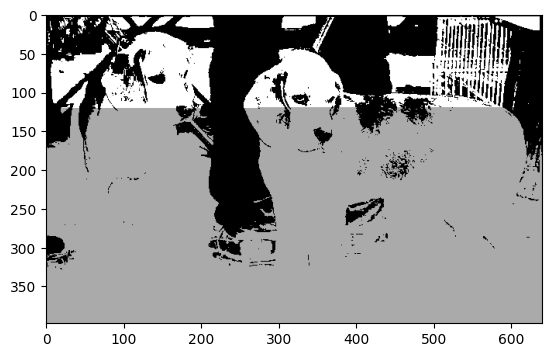

In [58]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

## Video object detection

In [13]:
cap = cv2.VideoCapture('Traffic IP Camera video.mp4') # can be changed to webcam 
ret, frame = cap.read()

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter('video.avi', fourcc, 25, (frame.shape[1], frame.shape[0]))  #25 is the frame rate of output video you can change it as required


In [14]:
if not cap.isOpened():
    cap = cv2.VideoCapture('0')    
if not cap.isOpened():
    raise IOError("video is invalid")

In [15]:
while True:
    ret,frame =cap.read()
    classIndex, confidence, bbox = model.detect(frame , confThreshold=0.65)  #tune the confidence  as required
    if (len(classIndex) != 0 ):
        for classInd, boxes in zip(classIndex.flatten(), bbox):
            if (classInd<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[classInd-1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = 1, color=(0, 255, 0), thickness=2)
    cv2.imshow('Test Video',frame)
    video.write(frame)

    if cv2.waitKey(2)& 0xFF == ord('q'):
        break
        
cap.release()
video.release()
cv2.destroyAllWindows()


## Another Test on Video

In [16]:
cap = cv2.VideoCapture('Panasonic CCTV - Scene 2 .mp4') # can be changed to webcam 
ret, frame = cap.read()

In [17]:
if not cap.isOpened():
    cap = cv2.VideoCapture('0')    
if not cap.isOpened():
    raise IOError("video is invalid")

In [18]:
while True:
    ret,frame =cap.read()
    classIndex, confidence, bbox = model.detect(frame , confThreshold=0.65)  #tune the confidence  as required
    if (len(classIndex) != 0 ):
        for classInd, boxes in zip(classIndex.flatten(), bbox):
            if (classInd<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                cv2.putText(frame, classLabels[classInd-1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = 1, color=(0, 255, 0), thickness=2)
    cv2.imshow('Test Video',frame)
    
    if cv2.waitKey(2)& 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()


# Webcam Test

In [8]:
cap = cv2.VideoCapture(0) # can be changed to webcam 
ret, frame = cap.read()

In [9]:
if not cap.isOpened():
    cap = cv2.VideoCapture('0')    
if not cap.isOpened():
    raise IOError("webcam is invalid")

In [10]:
def distance_between_points(x1, y1, x2, y2):
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

In [11]:
while True:
    ret,frame =cap.read()
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Calculate the center coordinates
    center_x = width // 2
    center_y = height // 2
    classIndex, confidence, bbox = model.detect(frame , confThreshold=0.65)  #tune the confidence  as required

    if (len(classIndex) != 0 ):
        for classInd, boxes in zip(classIndex.flatten(), bbox):
            if (classInd<=80):
                cv2.rectangle(frame, boxes, (255, 0, 0), 2)
#                 x , y ,w ,h = boxes
#                 center_x_BOX = x + w // 2
#                 center_y_BOX = y + h // 2
#                 cv2.circle(frame, (center_x_BOX, center_y_BOX), 5, (0, 0, 255), -1)
#                 cv2.circle(frame, (center_x, center_y), 5, (0, 255, 0), -1)
#                 center_distance = distance_between_points(center_x , center_y , center_x_BOX , center_y_BOX)
                cv2.putText(frame, classLabels[classInd-1], (boxes[0] + 10, boxes[1] + 40), font, fontScale = 1, color=(0, 255, 0), thickness=2)
            
            
    cv2.imshow('Test Video',frame)
    print(classLabels[classInd-1])
        
    if cv2.waitKey(2)& 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()


person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person
person


IndexError: list index out of range